# Heart Attack EDA And Prediction

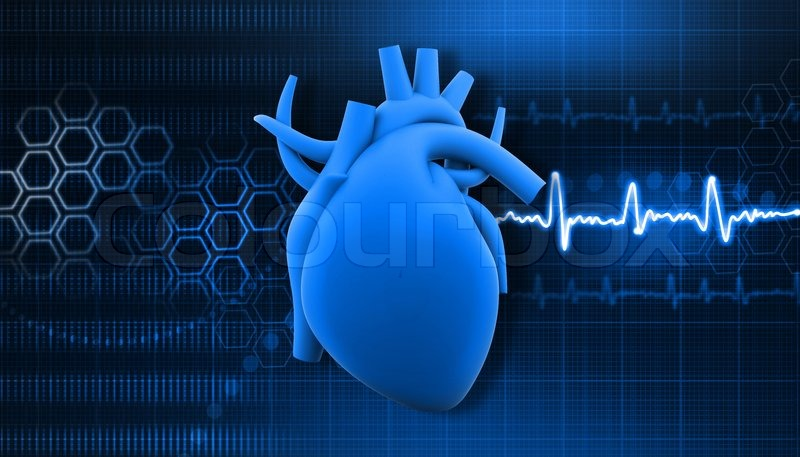

A heart attack occurs when one or more of your coronary arteries becomes blocked. Over time, a buildup of fatty deposits, including cholesterol, form substances called plaques, which can narrow the arteries (atherosclerosis). This condition, called coronary artery disease, causes most heart attacks.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### Read The Dataset

In [2]:
heart=pd.read_csv('C:/Users/HP/Desktop/Heart Attack Prediction/Heart.csv')

In [3]:
o2Saturation=pd.read_csv('C:/Users/HP/Desktop/Heart Attack Prediction/o2Saturation.csv')

In [4]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
o2Saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [6]:
heart.shape

(303, 14)

In [7]:
col=heart.columns
col

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

check for the missing values

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No Missing Values are found

## Univariate Analysis

### Categorical and Target features

<AxesSubplot:title={'center':'target variable'}>

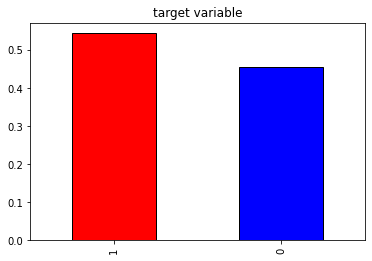

In [13]:
# Target variable
heart['output'].value_counts(normalize=True).plot.bar(color=['red','blue'],edgecolor='black',title='target variable')

Around 55% people have more chances to get heart attack

Around 45% people have less chances to get heart attack

## Sex Feature

<AxesSubplot:title={'center':'sex variable'}>

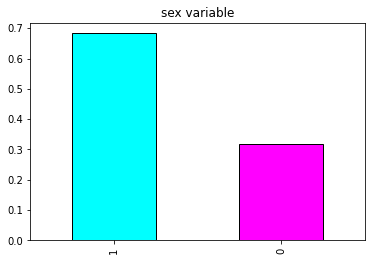

In [14]:
# sex variable
heart['sex'].value_counts(normalize=True).plot.bar(color=['cyan','magenta'],edgecolor='black',title='sex variable')

Around 68 % people are with sex=1

 Around 30 % people are with sex=0


## Chest Pain Feature

<AxesSubplot:title={'center':'chest pain variable'}>

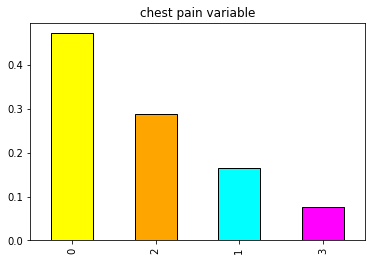

In [15]:
# cp variable
heart['cp'].value_counts(normalize=True).plot.bar(color=['yellow','orange','cyan','magenta'],edgecolor='black',title='chest pain variable')

## 1.Exercise Induced Angina

## 2.Fasting Blood Sugar > 120 mg/dl

## 3.resting electrocardiographic results

## 4. Slope

<AxesSubplot:title={'center':'- Slope'}>

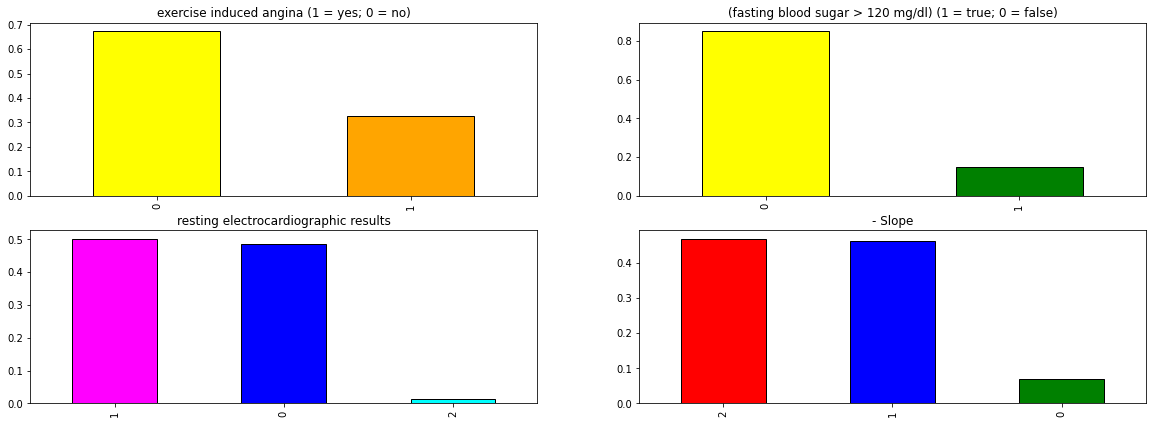

In [16]:
plt.figure(figsize=(20,7))
plt.subplot(221)
heart['exng'].value_counts(normalize=True).plot.bar(color=['yellow','orange'],edgecolor='black',title='exercise induced angina (1 = yes; 0 = no)')
plt.subplot(222)
heart['fbs'].value_counts(normalize=True).plot.bar(color=['yellow','green'],edgecolor='black',title='(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.subplot(223)
heart['restecg'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan'],edgecolor='black',title='resting electrocardiographic results')
plt.subplot(224)
heart['slp'].value_counts(normalize=True).plot.bar(color=['red','blue','green'],edgecolor='black',title='- Slope')

More than 65 % of the people Exercise don't induced angina

More than 35 % of the people Exercise induced angina

less than 20 % of the people have fasting blood sugar > 120 mg/dl

More than 80 % of the people have fasting blood sugar <= 120 mg/dl

less than 50 % of the people have resting electrocardiographic results normal

50 % of the people have resting electrocardiographic results: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

1% or 2% of the people have resting electrocardiographic results: showing probable or definite left ventricular hypertrophy by Estes' criteria

## 1.number of major vessels

## 2.Thalium Stress Test result ~ (0,3)

<AxesSubplot:title={'center':'Thalium Stress Test result ~ (0,3)'}>

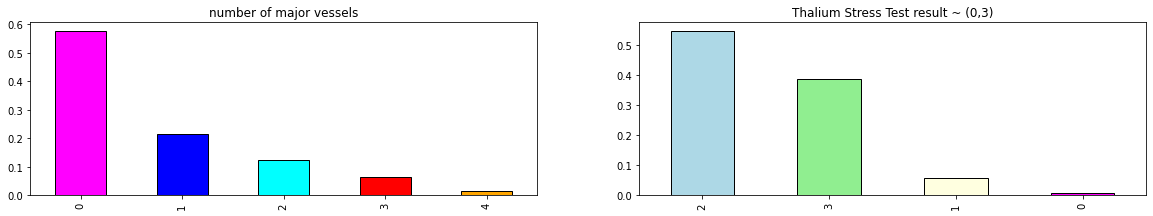

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(221)
heart['caa'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan','red','orange'],edgecolor='black',title='number of major vessels')
plt.subplot(222)
heart['thall'].value_counts(normalize=True).plot.bar(color=['lightblue','lightgreen','lightyellow','magenta'],edgecolor='black',title='Thalium Stress Test result ~ (0,3)')

# Numerical features

In [18]:
numerical_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Age , Blood pressure , Cholestoral , Heart Rate

<AxesSubplot:title={'center':'maximum heart rate achieved'}, ylabel='Frequency'>

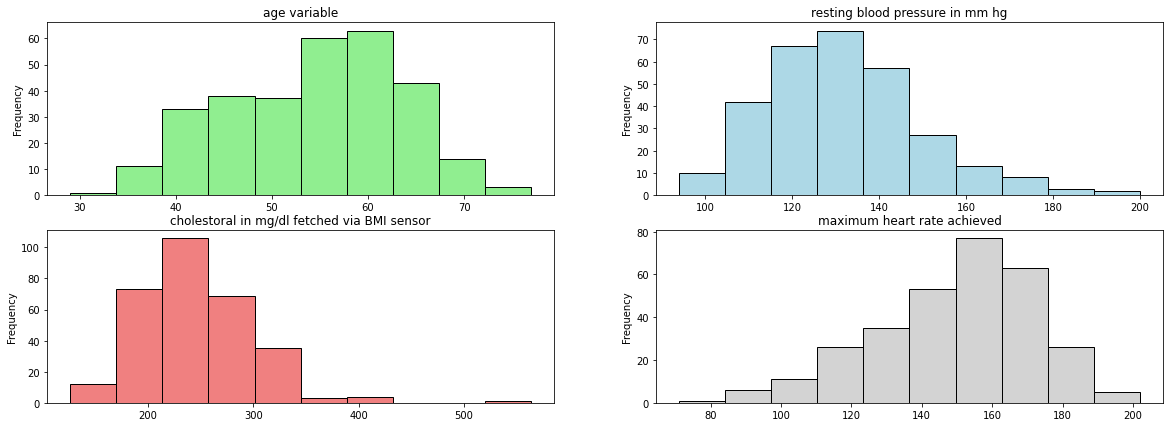

In [19]:
plt.figure(figsize=(20,7))
plt.subplot(221)
heart['age'].plot.hist(edgecolor='black',color='lightgreen',title='age variable')
plt.subplot(222)
heart['trtbps'].plot.hist(edgecolor='black',color='lightblue',title='resting blood pressure in mm hg')
plt.subplot(223)
heart['chol'].plot.hist(edgecolor='black',color='lightcoral',title='cholestoral in mg/dl fetched via BMI sensor')
plt.subplot(224)
heart['thalachh'].plot.hist(edgecolor='black',color='lightgray',title='maximum heart rate achieved')

# Oldpeak

<AxesSubplot:title={'center':'oldpeak variable'}, ylabel='Frequency'>

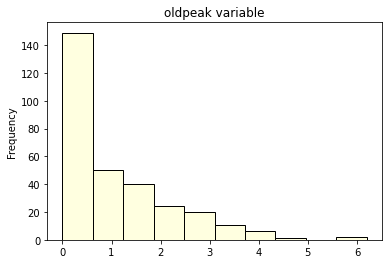

In [20]:
heart['oldpeak'].plot.hist(edgecolor='black',color='lightyellow',title='oldpeak variable')

# Bivariate Analysis

## Effect Of Age On Heart Attack

<AxesSubplot:title={'center':'effect of age on heart attack'}, xlabel='age', ylabel='output'>

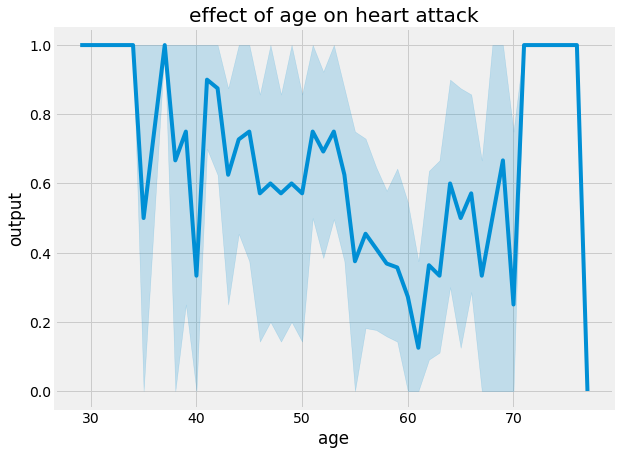

In [21]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart attack")
sns.lineplot(x=heart['age'],y=heart['output'])

The people with the age 30 to 35 have higher chance of heart attacks

The people with the age than 70 and less than 75 have higher chance of heart attacks



Apart from it no certain trend i will be able to find

# Heart attack related with sex

<AxesSubplot:xlabel='sex', ylabel='count'>

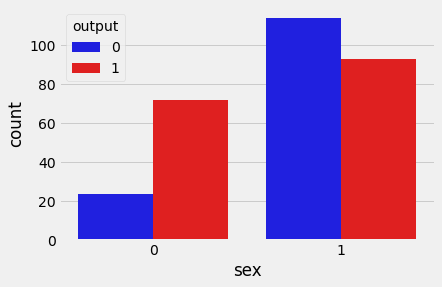

In [22]:
sns.countplot(data=heart,x='sex',palette=["blue","red"], hue='output')

people of sex=1 have higher chances of getting heart attacks

##                             Heart attack related with chest pain

<AxesSubplot:xlabel='cp', ylabel='Density'>

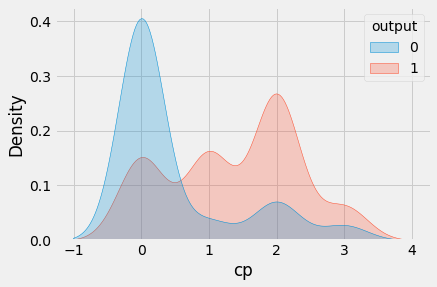

In [23]:
sns.kdeplot(data=heart, x='cp',hue="output", fill=True)

people with chest pain type=2 have higher chance of getting heart attacks

## Heart attack related with age

<AxesSubplot:xlabel='age', ylabel='Density'>

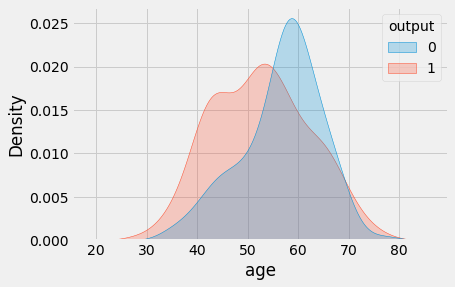

In [24]:
sns.kdeplot(data=heart, x='age',hue="output", fill=True)

According to the data people with lower age have more chances of getting heart attacks than those of higher ages

## Heat attack realted with thalium stress test

<AxesSubplot:xlabel='thall', ylabel='Density'>

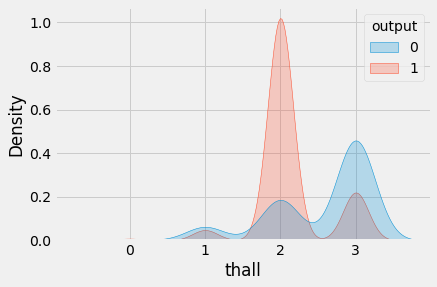

In [26]:
sns.kdeplot(data=heart, x='thall',hue="output", fill=True)

people with thall test=2 have higher chance of getting heart attacks

## Heart Attack realted with Exercise Induced Angina

<AxesSubplot:xlabel='exng', ylabel='Density'>

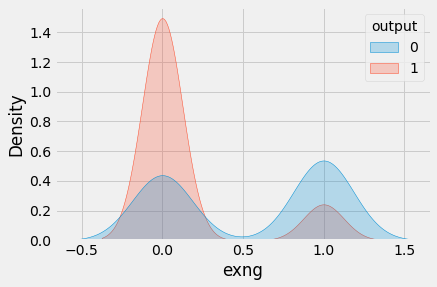

In [27]:
sns.kdeplot(data=heart, x='exng',hue="output", fill=True)

people with exng=0 have higher chances of getting heart attacks

## Effect Of Age On Blood Pressure

<AxesSubplot:title={'center':'effect of age on blood pressure'}, xlabel='age', ylabel='trtbps'>

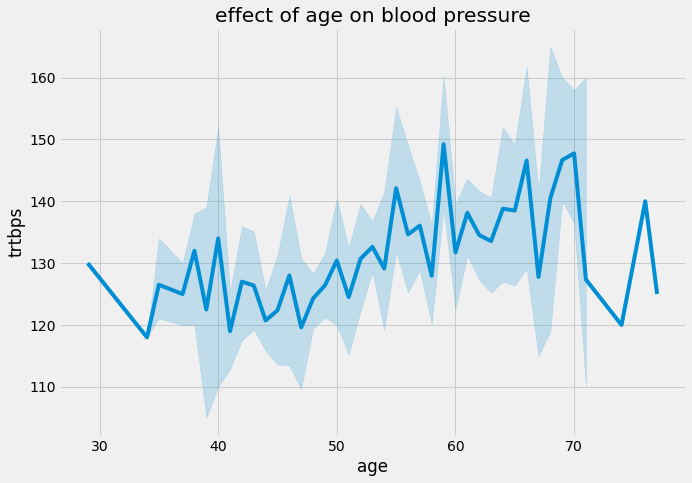

In [28]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on blood pressure")
sns.lineplot(x=heart['age'],y=heart['trtbps'])

As Age is incresing the increase in the blood pressure has been founded

## Effect Of Age On Cholestrol Level

<AxesSubplot:title={'center':'effect of age on cholestrol level'}, xlabel='age', ylabel='chol'>

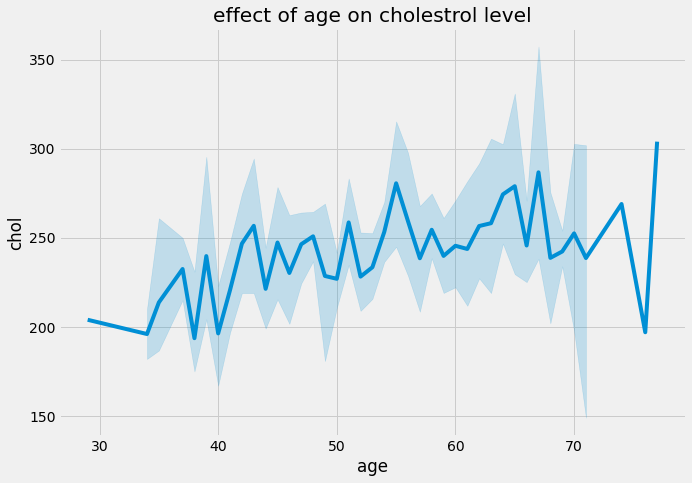

In [29]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on cholestrol level")
sns.lineplot(x=heart['age'],y=heart['chol'])

As age is incresing the increase in the cholestrol level has been founded

## Effect Of Age On Heart Rate

<AxesSubplot:title={'center':'effect of age on heart rate'}, xlabel='age', ylabel='thalachh'>

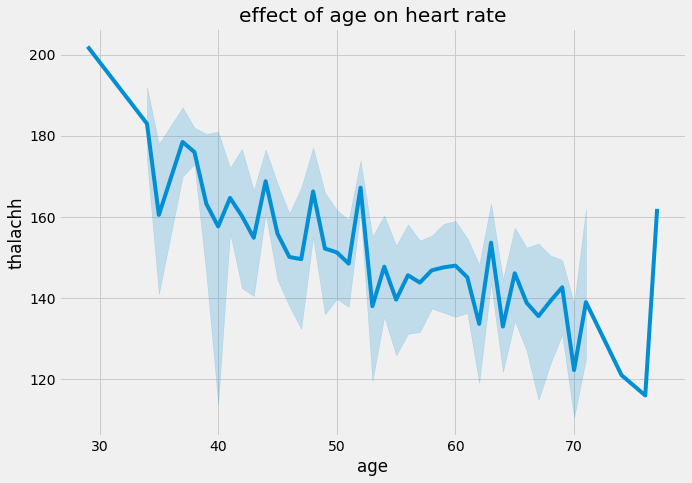

In [31]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart rate")
sns.lineplot(x=heart['age'],y=heart['thalachh'])

As age is incresing the decrease in the heart rate has been founded



# How does incresed heart rate and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and heart rate'}, xlabel='age', ylabel='thalachh'>

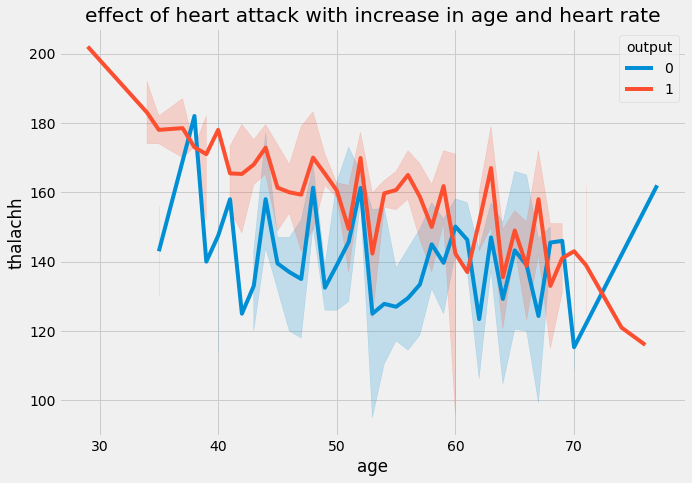

In [33]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and heart rate")
sns.lineplot(x=heart['age'],y=heart['thalachh'],hue=heart['output'])

as with the increase in the age the heart rate is decresing and also the people with more chances of heart attacks are decreasing hence we can say higher heart rate increases the chance of heart attack

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

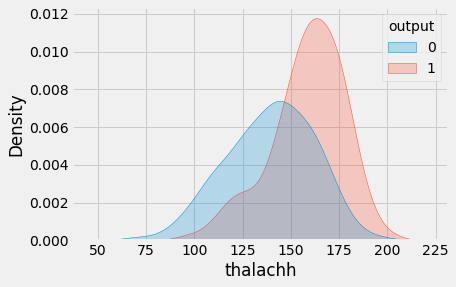

In [34]:
sns.kdeplot( data=heart, x='thalachh',hue="output",fill=True)

## How does incresed cholestrol and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and cholestrol'}, xlabel='age', ylabel='chol'>

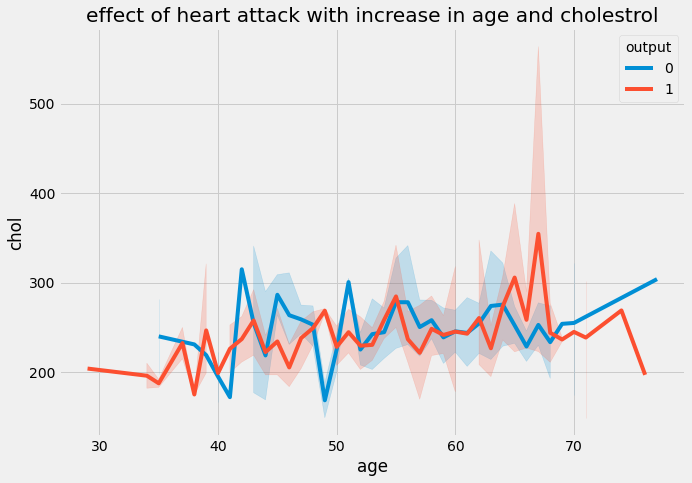

In [35]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and cholestrol")
sns.lineplot(x=heart['age'],y=heart['chol'],hue=heart['output'])

As with the increase in the age the cholestrol level is incresing and also the people with more chances of heart attacks are also increasing hence we can say higher cholestrol level increases the chance of heart attack


<AxesSubplot:xlabel='chol', ylabel='Density'>

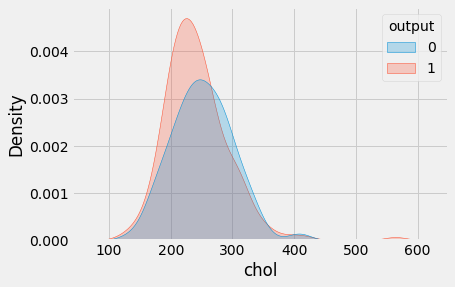

In [37]:
sns.kdeplot( data=heart, x='chol',hue="output",fill=True)

## How does incresed blood pressure and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and blood pressure'}, xlabel='age', ylabel='trtbps'>

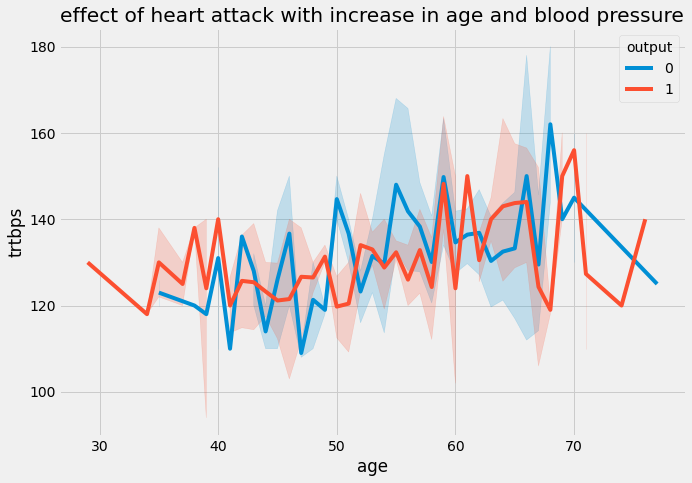

In [38]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and blood pressure")
sns.lineplot(x=heart['age'],y=heart['trtbps'],hue=heart['output'])

 As with the increase in the age the blood pressure is incresing and also the people with more chances of heart attacks are also increasing hence we can say blood pressure increases the chance of heart attack

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

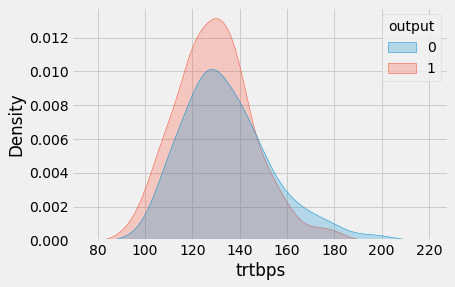

In [39]:
sns.kdeplot( data=heart, x='trtbps',hue="output",fill=True)

# Model Building

In [40]:
target=heart['output']
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [41]:
heart.drop(['output'],axis=1,inplace=True)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Checking For Skewness

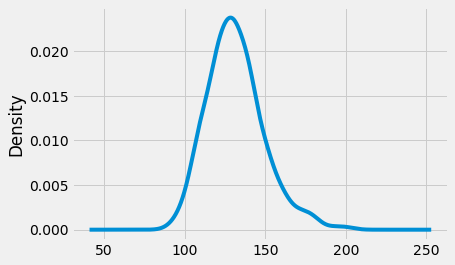

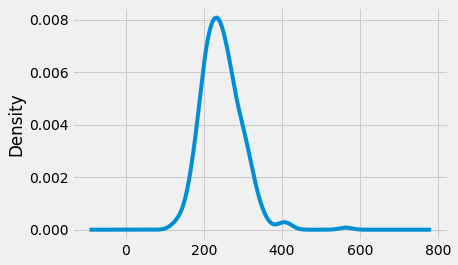

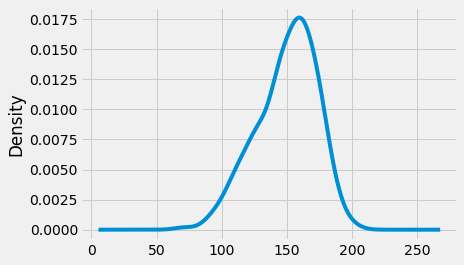

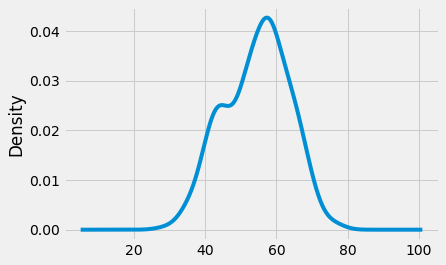

In [42]:
heart['trtbps'].plot(kind='density')
plt.show()
heart['chol'].plot(kind='density')
plt.show()
heart['thalachh'].plot(kind='density')
plt.show()
heart['age'].plot(kind='density')
plt.show()

In [43]:
heart.head(1)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


# Robust Scaler

In [45]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(heart)
robust_df = pd.DataFrame(robust_df, columns =['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])
robust_df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,0.0,0.0,1.0
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,0.0,0.0,1.0
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,0.0,2.0,1.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,0.0,1.0,1.0


# Standard Scaler

In [46]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(robust_df)
standard_df = pd.DataFrame(standard_df, columns =['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

In [48]:
standard_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


# Train Test Split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(heart,target,test_size=0.1,random_state=42)

# Logistic Regression

In [50]:
logistic=LogisticRegression(max_iter=100,random_state=1,n_jobs=-1)
logistic.fit(x_train,y_train)
pred1=logistic.predict(x_test)
pred1

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [51]:
logistic.score(x_train,y_train)*100

85.66176470588235

In [52]:
logistic.score(x_test,y_test)*100


80.64516129032258

In [53]:
from sklearn.metrics import accuracy_score

print('Logistic Regresson model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred1)))

Logistic Regresson model accuracy score: 0.8065


# Decision Tree

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
d_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train,y_train)*100,2)
print(f'{acc_decision_tree}%')

100.0%


In [55]:
from sklearn.metrics import accuracy_score

print('Decision Tree model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, d_pred)))

Decision Tree model accuracy score: 0.8387


# LightGBM

In [56]:
import lightgbm as lgb
lgbm= lgb.LGBMClassifier()
lgbm.fit(x_train,y_train)
pred2=lgbm.predict(x_test)
acc_lgbm=round(lgbm.score(x_train,y_train)*100,2)
print(f'{acc_lgbm}%')

100.0%


In [57]:
from sklearn.metrics import accuracy_score

print('LightGBM model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred2)))

LightGBM model accuracy score: 0.8065


# XGBoost

In [58]:
import xgboost as xgb
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=heart,label=target)

DMatrix is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed.

In [59]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators':100
        }         


In [60]:
import xgboost as xgb
xgbo= xgb.XGBClassifier(**params)
xgbo.fit(x_train,y_train)
pred3=xgbo.predict(x_test)
acc_xgbo=round(xgbo.score(x_train,y_train)*100,2)
print(f'{acc_xgbo}%')

[16:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
87.5%


In [61]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred3)))

XGBoost model accuracy score: 0.8387


# XGBoost with Cross Validation

In [66]:
# cross validation
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [67]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.619611,0.008169,0.541682,0.026292
1,0.854533,0.021510,0.799908,0.025966
2,0.868563,0.016513,0.826395,0.020563
3,0.886020,0.008262,0.852570,0.020090
4,0.901429,0.013803,0.870969,0.023022


In [68]:
xgb_cv.shape

(11, 4)

In [72]:
accuracy_xgb=xgb_cv["test-auc-mean"]
print(accuracy_xgb)

0     0.541682
1     0.799908
2     0.826395
3     0.852570
4     0.870969
5     0.871839
6     0.881377
7     0.885681
8     0.889958
9     0.894272
10    0.896062
Name: test-auc-mean, dtype: float64


# Insights how model has arrived at its final decision

In [73]:
xg_reg = xgb.train(params=params,dtrain=data_dmatrix, num_boost_round=10)

[17:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


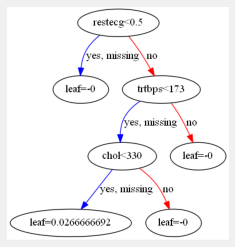

In [74]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

# Feature Importance

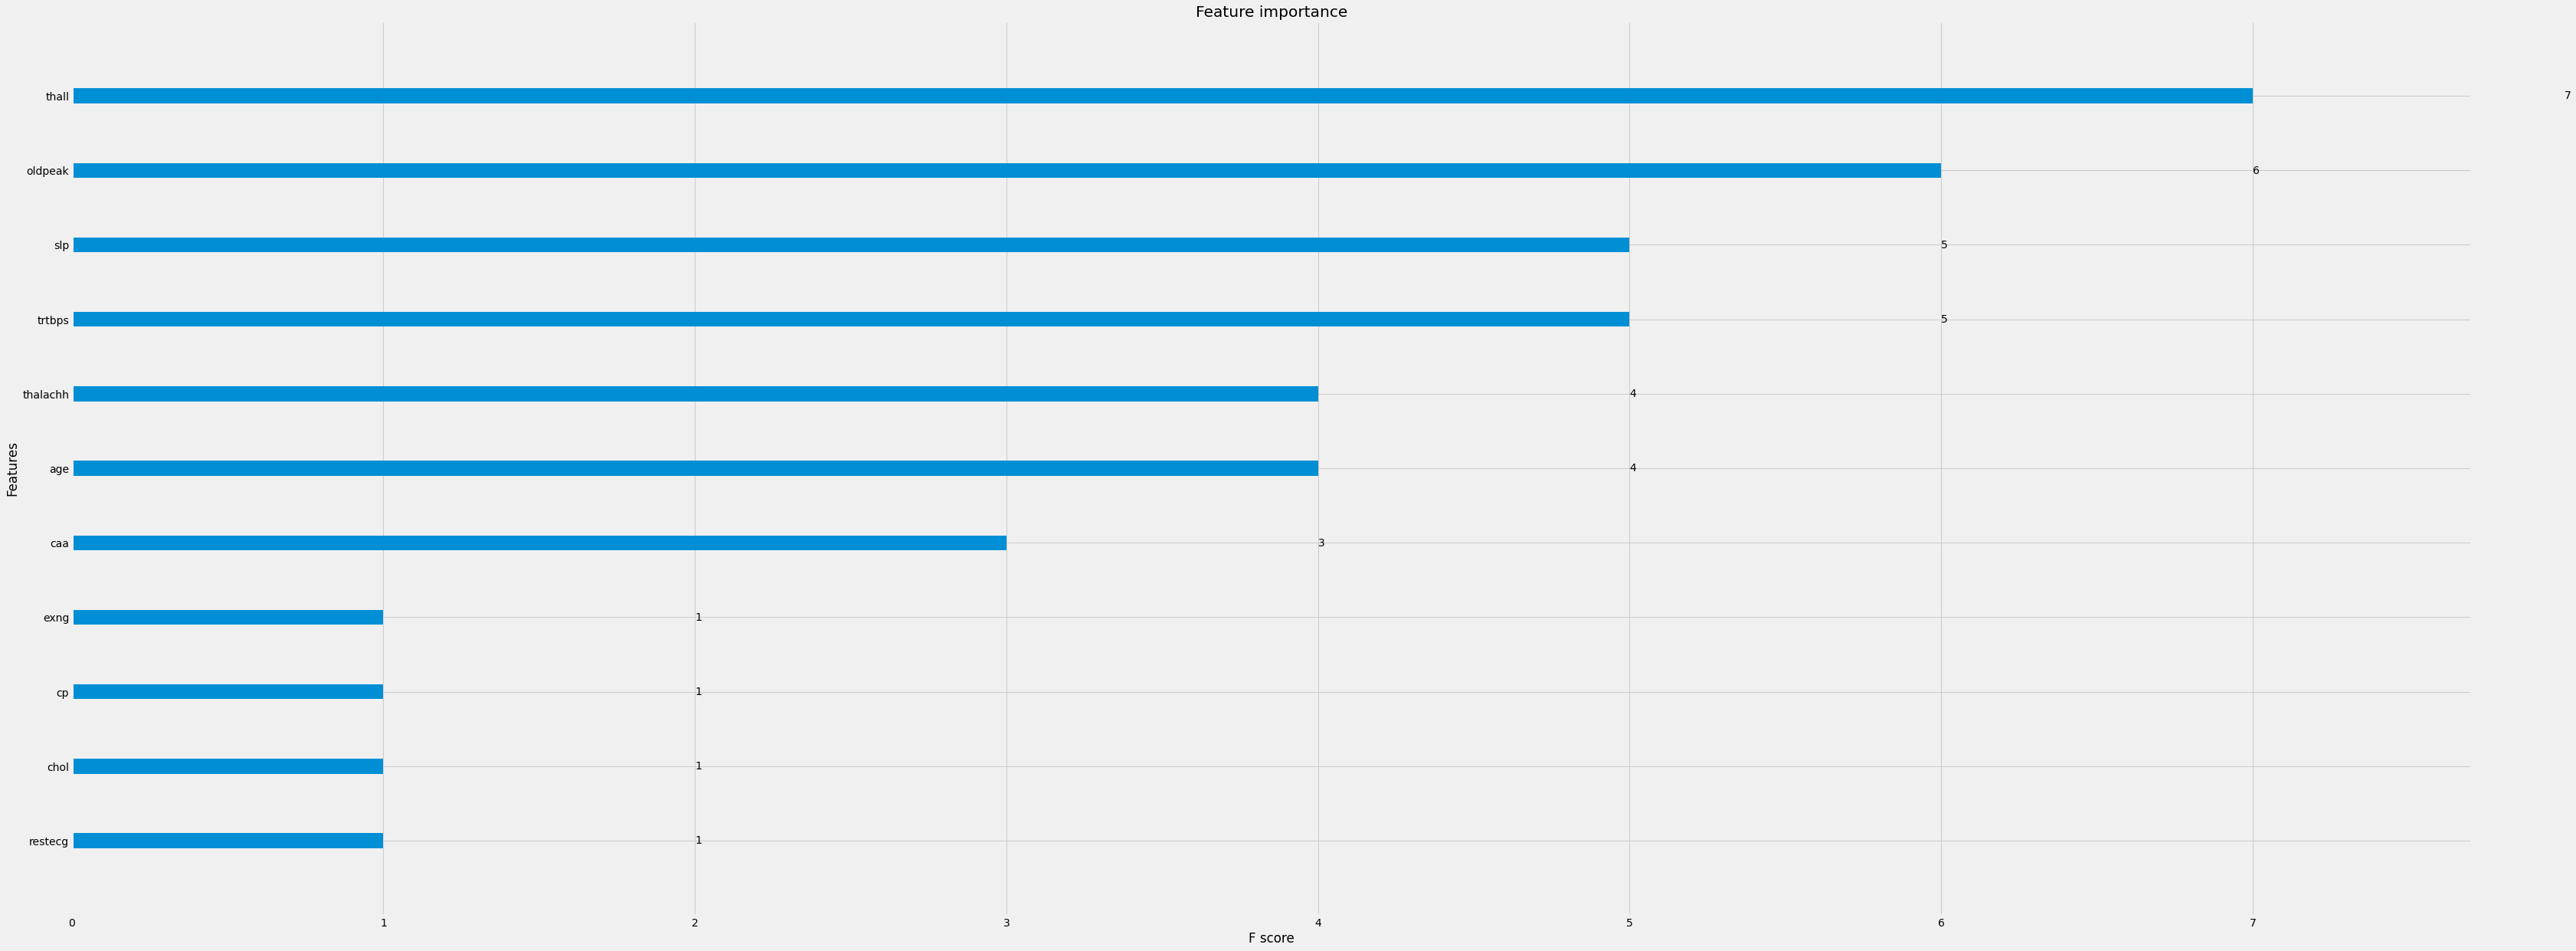

In [75]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [6, 6]
plt.show()

The most imporatant feature of the dataset is age and the less important feature id chest pain and thalachh